In [1]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical


In [29]:
# 载入和预处理数据
def load_and_preprocess_data(file_paths, label):
    data = []
    for file_path in file_paths:
        audio_data, _ = librosa.load(file_path, sr=None)
        data.append(audio_data)
    labels = [label] * len(data)

    return data, labels


In [3]:
import os

# 提供包含无故障声音文件的文件夹路径
normal_folder_path = "../../dataforsound/slider/train/"

# 获取文件夹中的所有文件
normal_file_paths = [os.path.join(normal_folder_path, file) for file in os.listdir(normal_folder_path)]

In [4]:
normal_file_paths

['../../dataforsound/slider/train/normal_id_00_00000000.wav',
 '../../dataforsound/slider/train/normal_id_00_00000001.wav',
 '../../dataforsound/slider/train/normal_id_00_00000002.wav',
 '../../dataforsound/slider/train/normal_id_00_00000003.wav',
 '../../dataforsound/slider/train/normal_id_00_00000004.wav',
 '../../dataforsound/slider/train/normal_id_00_00000005.wav',
 '../../dataforsound/slider/train/normal_id_00_00000006.wav',
 '../../dataforsound/slider/train/normal_id_00_00000007.wav',
 '../../dataforsound/slider/train/normal_id_00_00000008.wav',
 '../../dataforsound/slider/train/normal_id_00_00000009.wav',
 '../../dataforsound/slider/train/normal_id_00_00000010.wav',
 '../../dataforsound/slider/train/normal_id_00_00000011.wav',
 '../../dataforsound/slider/train/normal_id_00_00000012.wav',
 '../../dataforsound/slider/train/normal_id_00_00000013.wav',
 '../../dataforsound/slider/train/normal_id_00_00000014.wav',
 '../../dataforsound/slider/train/normal_id_00_00000015.wav',
 '../../

In [15]:
faulty_file_path = "../../dataforsound/slider/default"

# 获取文件夹中的所有文件
faulty_file_paths = [os.path.join(faulty_file_path, file) for file in os.listdir(faulty_file_path)]

In [16]:
faulty_file_paths

['../../dataforsound/slider/default\\anomaly_id_00_00000000.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000001.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000002.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000003.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000004.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000005.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000006.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000007.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000008.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000009.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000010.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000011.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000012.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000013.wav',
 '../../dataforsound/slider/default\\anomaly_id_00_00000014.wav',
 '../../da

In [12]:
# 数据准备
normal_data, normal_labels = load_and_preprocess_data(normal_file_paths, label='normal')

In [17]:
faulty_data, faulty_labels = load_and_preprocess_data(faulty_file_paths, label='faulty')

In [18]:
all_data = normal_data + faulty_data
all_labels = normal_labels + faulty_labels

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',

In [23]:
# 将标签编码为数字
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)
encoded_labels = to_categorical(encoded_labels)
encoded_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(all_data, encoded_labels, test_size=0.2, random_state=42)
X_train

[array([ 0.00073242, -0.0027771 , -0.00256348, ...,  0.00680542,
         0.01071167,  0.01065063], dtype=float32),
 array([-0.00372314, -0.00463867, -0.00106812, ..., -0.01119995,
        -0.01330566, -0.01455688], dtype=float32),
 array([ 0.00048828, -0.0005188 , -0.00802612, ...,  0.00979614,
         0.01031494,  0.01171875], dtype=float32),
 array([-0.01791382, -0.02523804, -0.01107788, ...,  0.0128479 ,
         0.01031494,  0.00845337], dtype=float32),
 array([ 0.00537109,  0.01898193, -0.00415039, ...,  0.00106812,
         0.01300049,  0.00912476], dtype=float32),
 array([-0.00674438, -0.00796509, -0.00549316, ..., -0.00900269,
        -0.01104736, -0.01486206], dtype=float32),
 array([-0.00759888, -0.00897217, -0.00259399, ..., -0.0067749 ,
        -0.01330566, -0.01153564], dtype=float32),
 array([-0.00323486, -0.00064087, -0.0093689 , ..., -0.00396729,
         0.00271606, -0.00817871], dtype=float32),
 array([-0.01300049, -0.01174927, -0.01190186, ...,  0.02032471,
       

In [50]:
# 提取MFCC特征
def extract_mfcc(data):
    mfccs = []
    for audio_data in data:
        mfcc = librosa.feature.mfcc(y = audio_data, sr= 22050 , n_mfcc=13)
        mfccs.append(mfcc)
    return np.array(mfccs)

In [51]:
X_train_mfcc = extract_mfcc(X_train)

In [52]:
X_test_mfcc = extract_mfcc(X_test)

In [57]:
X_train_mfcc.shape[2]

313

In [61]:
# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_mfcc.shape[1], X_train_mfcc.shape[2]), return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=2, activation='softmax'))  # 2是类别数（有故障、无故障）
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 13, 50)            72800     
                                                                 
 lstm_5 (LSTM)               (None, 13, 50)            20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 113302 (442.59 KB)
Trainable params: 113302 (442.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
# 训练模型
model.fit(X_train_mfcc, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
74/74 [==============================] - 5s 20ms/step - loss: 0.5219 - accuracy: 0.7635 - val_loss: 0.5277 - val_accuracy: 0.7377
Epoch 2/10
74/74 [==============================] - 1s 12ms/step - loss: 0.4257 - accuracy: 0.8215 - val_loss: 0.5683 - val_accuracy: 0.7716
Epoch 3/10
74/74 [==============================] - 1s 12ms/step - loss: 0.2870 - accuracy: 0.8972 - val_loss: 0.5839 - val_accuracy: 0.7699
Epoch 4/10
74/74 [==============================] - 1s 12ms/step - loss: 0.1865 - accuracy: 0.9327 - val_loss: 0.6675 - val_accuracy: 0.7851
Epoch 5/10
74/74 [==============================] - 1s 12ms/step - loss: 0.0943 - accuracy: 0.9691 - val_loss: 0.7970 - val_accuracy: 0.7445
Epoch 6/10
74/74 [==============================] - 1s 12ms/step - loss: 0.0838 - accuracy: 0.9717 - val_loss: 0.8640 - val_accuracy: 0.7766
Epoch 7/10
74/74 [==============================] - 1s 12ms/step - loss: 0.0374 - accuracy: 0.9877 - val_loss: 1.1382 - val_accuracy: 0.7631
Epoch 8/10
74

In [64]:

# 在测试集上评估模型
loss, accuracy = model.evaluate(X_test_mfcc, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


24/24 [==============================] - 0s 5ms/step - loss: 1.0767 - accuracy: 0.7808
Test Loss: 1.0767
Test Accuracy: 0.7808


In [67]:

# 使用模型进行预测
predictions = model.predict(X_test_mfcc)

# 选择一个阈值
threshold = 0.5

# 将概率转换为二进制标签
predicted_labels = (predictions[:, 1] > threshold).astype(int)

# 在测试集上进行最终判断
if 1 in predicted_labels:
    print("有噪音！")
else:
    print("无噪音。")

24/24 [==============================] - 0s 5ms/step
有噪音！


In [150]:
# 假设 new_audio_data 是新音频的数据
new_mfcc_features = extract_mfcc([faulty_data[700]])
new_predictions = model.predict(new_mfcc_features)
new_predictions[:,1]
threshold = 0.91  # 举例，根据实际情况调整
predicted_labels = (new_predictions[:, 1] > threshold).astype(int)
if 0 in predicted_labels:
    print("有噪音！")
else:
    print("无噪音。")

1/1 [==============================] - 0s 16ms/step
有噪音！


In [143]:
predictions = model.predict(X_test_mfcc)
predicted_probabilities = predictions

24/24 [==============================] - 0s 5ms/step


In [144]:
y_true = y_test[:, 1] # 替换为你的测试集的真实标签

In [141]:
def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point

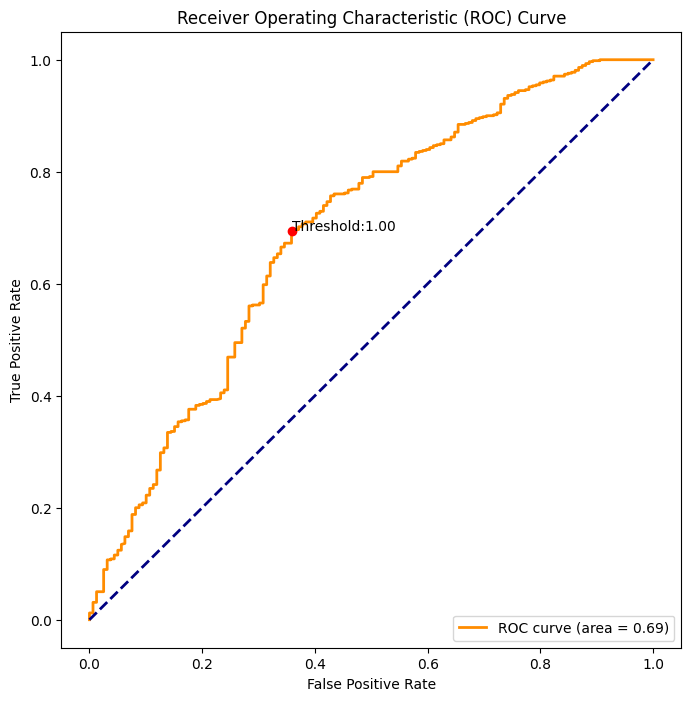

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, predicted_probabilities[:, 1])

# # 计算AUC
roc_auc = auc(fpr, tpr)
optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds)
# 绘制ROC曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [125]:
from sklearn.metrics import f1_score

# 计算不同阈值下的 F1 分数
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = [f1_score(y_true, (predicted_probabilities[:, 1] > threshold).astype(int)) for threshold in thresholds]

# 找到最大 F1 分数对应的阈值
optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.91


In [140]:
# 找到最接近 (0, 1) 的 ROC 曲线上的点
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
# print("Optimal Threshold:", optimal_threshold)

IndexError: index 459 is out of bounds for axis 0 with size 101

In [151]:
from keras.models import load_model
model.save("machinelisten_final.h5")  # 保存模型

C:\Users\ZhiQ\Desktop\machinelisten\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
